In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [ ]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Show the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop irrelevant columns (like CustomerID)
df = df.drop(['CustomerID'], axis=1)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


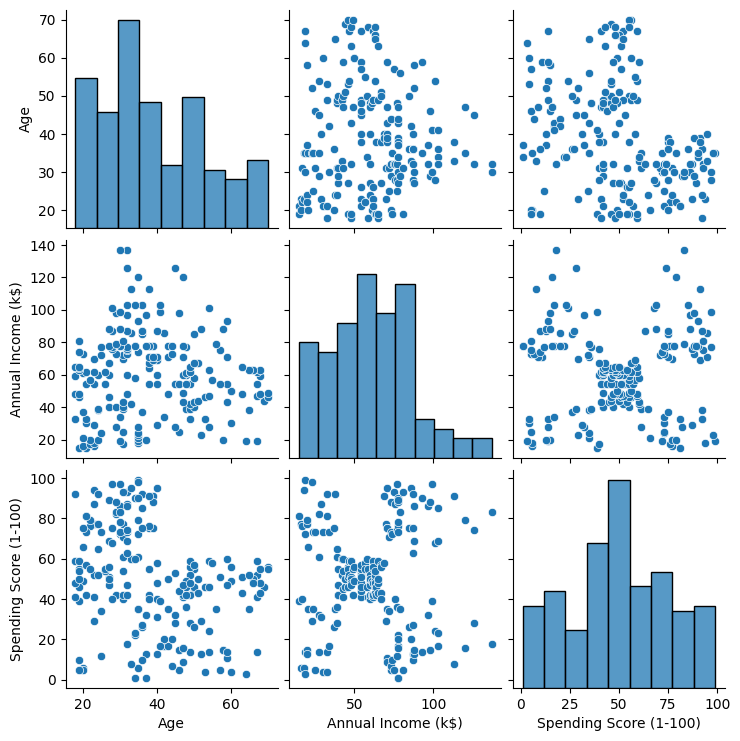

In [ ]:
# Pairplot to visualize data
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


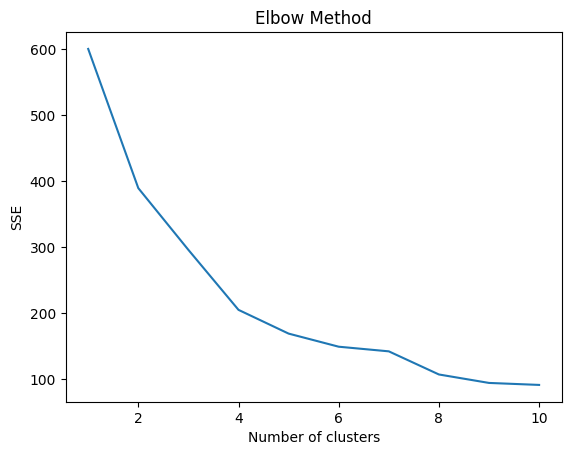

In [ ]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Fit KMeans with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(df_scaled)


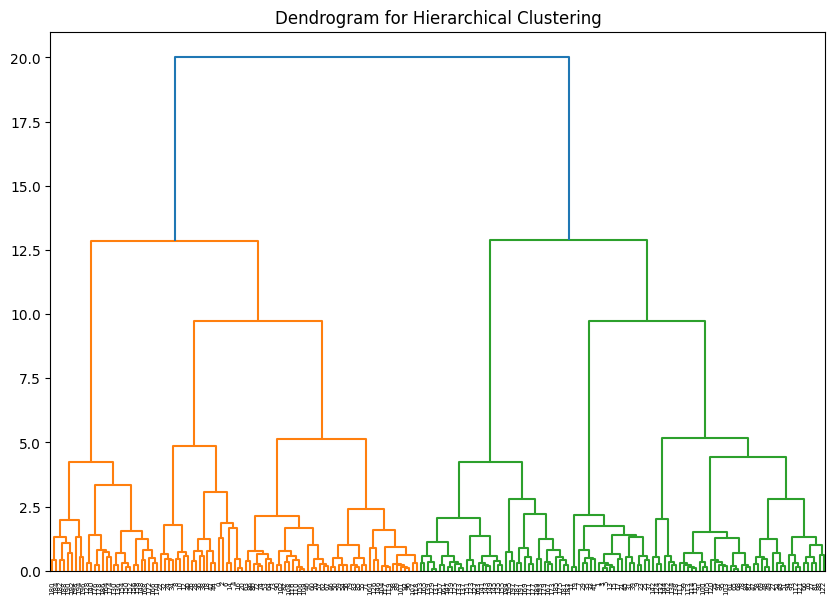

In [ ]:
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [ ]:
# Exclude non-numeric columns like 'Gender'
numeric_columns = df.select_dtypes(include=np.number).columns

# Analyze the clusters by calculating the mean of numeric columns
df.groupby('Cluster')[numeric_columns].mean()


,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster,,,,
0,32.692308,86.538462,82.128205,0.0
1,41.939394,88.939394,16.969697,1.0
2,25.272727,25.727273,79.363636,2.0
3,55.551724,48.482759,41.775862,3.0
4,27.770833,50.500000,43.916667,4.0


In [ ]:
df.to_csv('customer_segments.csv', index=False)
